In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Ridge

In [7]:
x,y = make_regression(n_features=1,n_samples=100,n_targets=1,n_informative=1,noise=20,random_state=13)

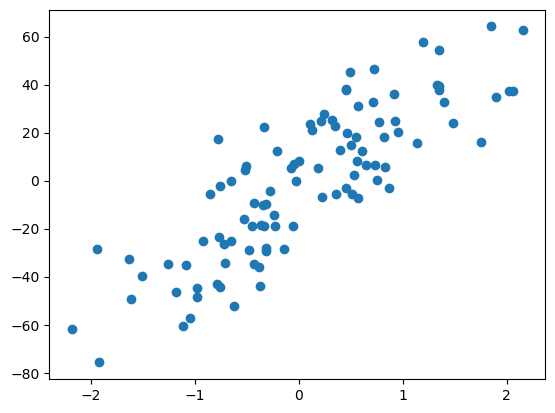

In [8]:
plt.scatter(x,y)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [15]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(lr.coef_)
print(lr.intercept_)
r2_score(y_test,y_pred)

[28.12597332]
-2.2710144261783816


0.6345158782661013

In [16]:
r = Ridge(alpha=10)
r.fit(x_train,y_train)
y_pred = r.predict(x_test)
print(r.coef_)
print(r.intercept_)
r2_score(y_test,y_pred)

[24.84312743]
-2.1047489001173156


0.6387892505532382

In [17]:
rr = Ridge(alpha=100)
rr.fit(x_train,y_train)
y_pred = rr.predict(x_test)
print(rr.coef_)
print(rr.intercept_)
r2_score(y_test,y_pred)

[12.11579539]
-1.4601506973989027


0.45924722403586427

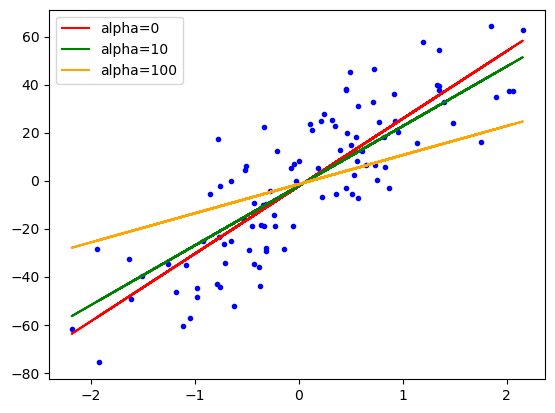

In [18]:
plt.plot(x,y,'b.')
plt.plot(x,lr.predict(x),color='red',label='alpha=0')
plt.plot(x,r.predict(x),color='green',label='alpha=10')
plt.plot(x,rr.predict(x),color='orange',label='alpha=100')
plt.legend()

In [19]:
class MyRidge:

    def __init__(self,alpha):
        self.m = None
        self.b = None
        self.alpha = alpha

    def fit(self,x_train,y_train):
        num = 0
        den = 0

        for i in range(x_train.shape[0]):
            num += (y_train[i]-y_train.mean())*(x_train[i]-x_train.mean())
            den += (x_train[i]-x_train.mean())*(x_train[i]-x_train.mean())

        self.m = num/(den+self.alpha)
        self.b = y_train.mean()-self.m*x_train.mean()
        print(self.b,self.m)

    def predict(self,x_test):
        return self.m*x_test+self.b

In [20]:
mr = MyRidge(10)
mr.fit(x_train,y_train)
y_pred = mr.predict(x_test)
r2_score(y_test,y_pred)

[-2.1047489] [24.84312743]


0.6387892505532382

In [21]:
mr = MyRidge(100)
mr.fit(x_train,y_train)
y_pred = mr.predict(x_test)
r2_score(y_test,y_pred)

[-1.4601507] [12.11579539]


0.4592472240358644